In [1]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import tool

In [2]:
train, test = tool.make_monthly_data('IndexPrices__US2792.xlsx')

In [3]:
stepwise_model = auto_arima(train.y, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=4, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1934.570, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1928.146, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1926.244, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1932.579, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1923.526, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1904.897, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1903.228, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1921.582, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1895.467, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1894.241, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1892.253, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1924.2

In [4]:
stepwise_model.fit(train.y)
pred = stepwise_model.predict_in_sample(dynamic=False)
train['y_train_pred'] = pred
train.iloc[0,2] = train.iloc[0,1]

In [5]:
test_pred = stepwise_model.predict(n_periods=36, dynamic=False)
test['y_test_pred'] = test_pred
df_union = pd.concat([train, test])

In [6]:
# error for train
tool.timeseries_evaluation_metrics_func(train.y, train.y_train_pred)

Evaluation metric results:-
MSE is : 47.85805496596809
MAE is : 4.509208397753007
RMSE is : 6.917951645246451
MAPE is : 0.13145844746320157
R2 is : 0.4946427252667336
Your model is not good enough. Please adjust it.


In [7]:
test.y_test[:18]

ds
2021-07-31    48.000
2021-08-31    49.500
2021-09-30    45.000
2021-10-31    38.000
2021-11-30    32.500
2021-12-31    53.375
2022-01-31    49.000
2022-02-28    59.000
2022-03-31    53.500
2022-04-30    75.000
2022-05-31    77.000
2022-06-30    87.500
2022-07-31    39.500
2022-08-31    37.250
2022-09-30    30.500
2022-10-31    30.500
2022-11-30    26.000
2022-12-31    30.000
Freq: M, Name: y_test, dtype: float64

In [8]:
# error for test 
tool.timeseries_evaluation_metrics_func(test.y_test[:18], test.y_test_pred[:18])

Evaluation metric results:-
MSE is : 412.3562706615551
MAE is : 14.763729370386345
RMSE is : 20.306557331599937
MAPE is : 0.26606093289419447
R2 is : -0.40822870158008384
Your model is not good enough. Please adjust it.


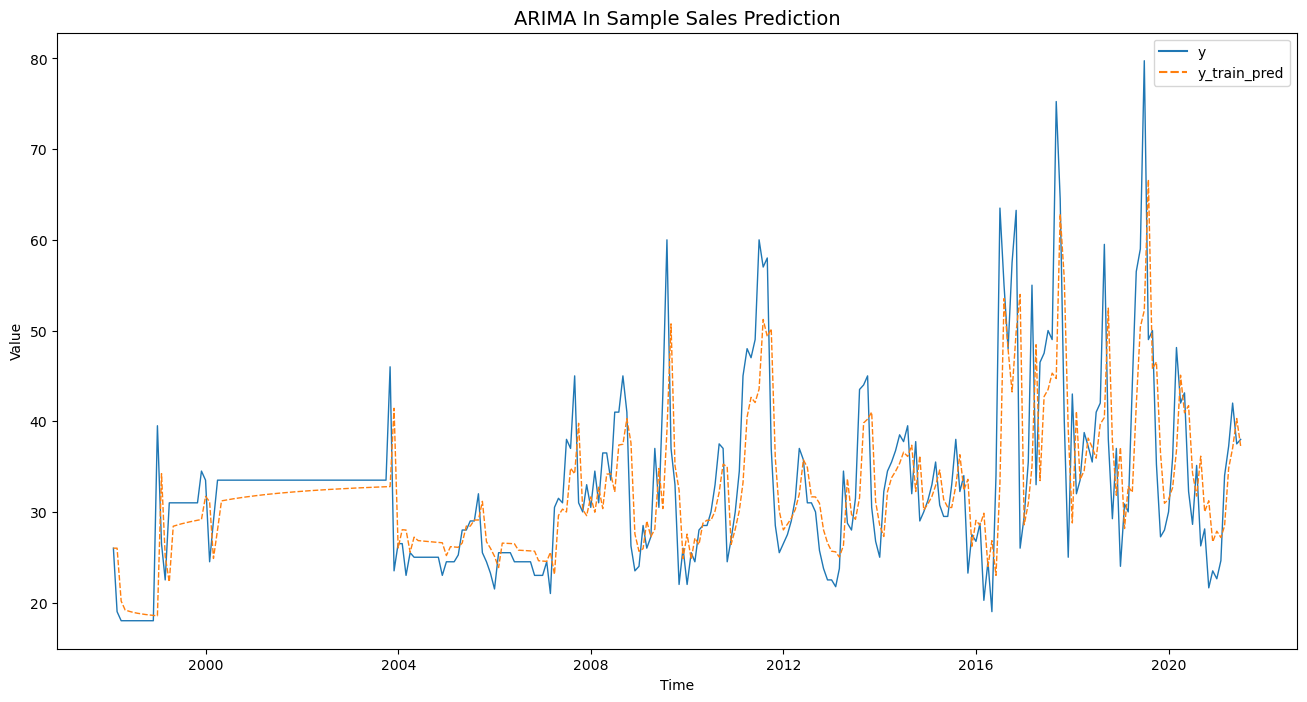

In [9]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("ARIMA In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=train[['y', 'y_train_pred']], linewidth=1.0)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

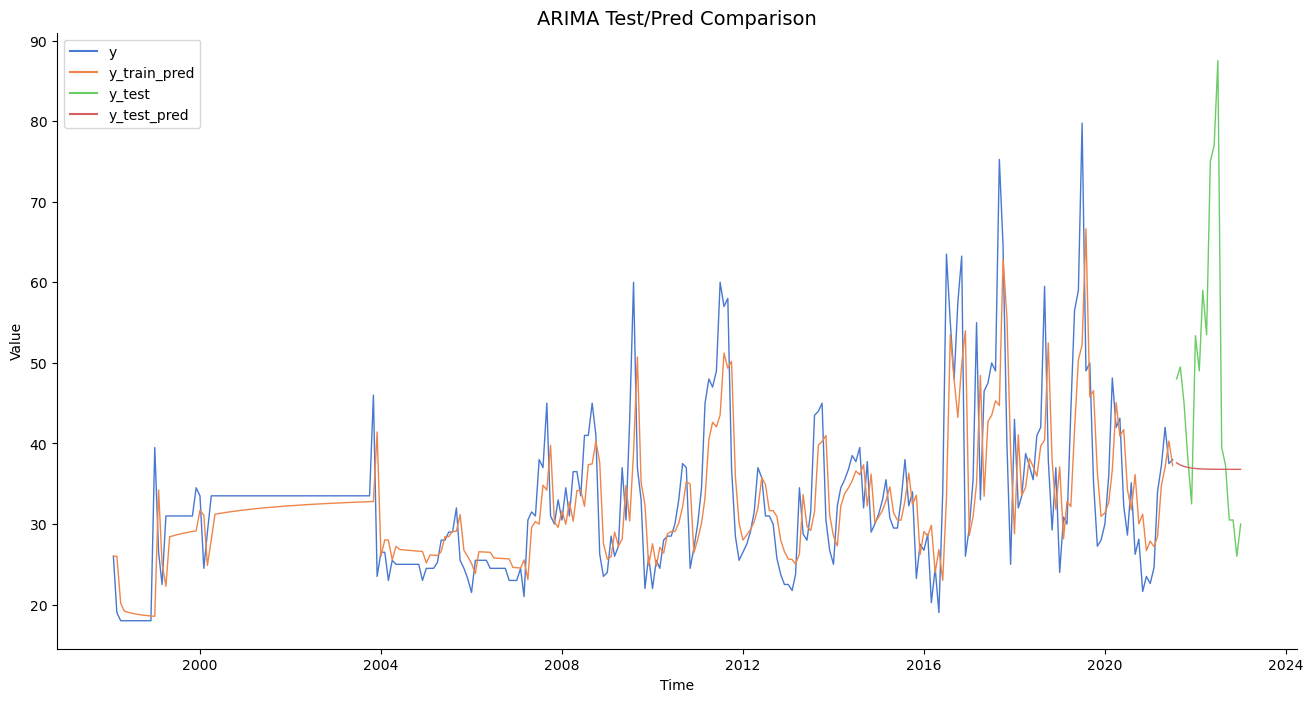

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("ARIMA Test/Pred Comparison", fontsize=14)
sns.despine()
sns.lineplot(data=df_union[['y', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [11]:
model = auto_arima(train.y, start_p=1, start_q=1, max_p=3, max_q=3, start_P=0, start_Q=0, \
    max_P=3, max_Q=3, m=12, seasonal=True, trace=True, d=1, D=1, \
    error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2006.160, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1920.656, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1843.521, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1975.985, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1845.512, Time=0.46 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1845.512, Time=0.95 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1903.825, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1846.938, Time=1.49 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1827.582, Time=0.77 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1829.572, Time=0.92 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.96 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1894.067, Time=0.43 sec
 ARIMA(1,1,1)(1,1,2)[12]          

In [12]:
model.fit(train.y)
pred = model.predict_in_sample(dynamic=False)
train['y_train_pred'] = pred
train.iloc[0,2] = train.iloc[0,1]

In [13]:
test_pred = model.predict(n_periods=36, dynamic=False)
test['y_test_pred'] = test_pred
df_union = pd.concat([train, test])

In [14]:
# error for train
tool.timeseries_evaluation_metrics_func(train.y, train.y_train_pred)

Evaluation metric results:-
MSE is : 50.942551019687826
MAE is : 4.681383185875897
RMSE is : 7.137405062043755
MAPE is : 0.13857230695868303
R2 is : 0.46207197995036475
Your model is not good enough. Please adjust it.


In [15]:
# error for test 
tool.timeseries_evaluation_metrics_func(test.y_test[:18], test.y_test_pred[:18])

Evaluation metric results:-
MSE is : 413.14565220643493
MAE is : 14.861119602102178
RMSE is : 20.32598465527402
MAPE is : 0.2572653614049647
R2 is : -0.41092450088541277
Your model is not good enough. Please adjust it.


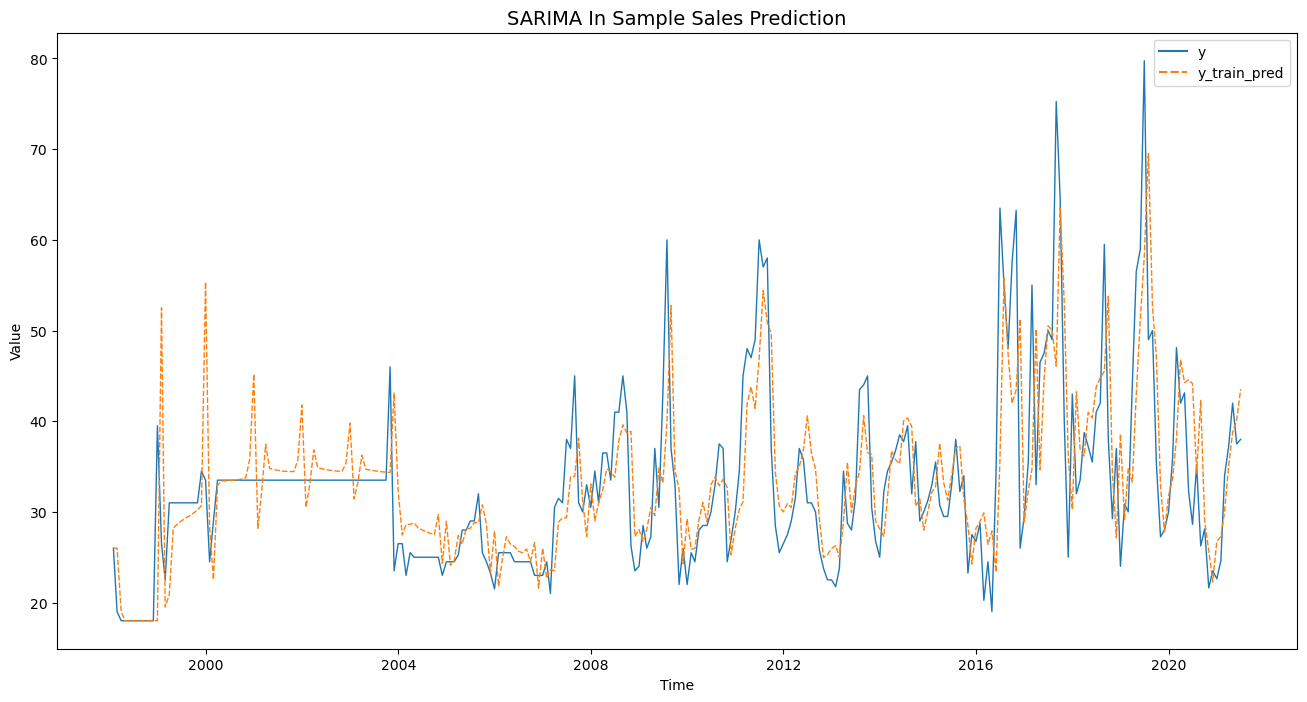

In [16]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("SARIMA In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=train[['y', 'y_train_pred']], linewidth=1.0)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

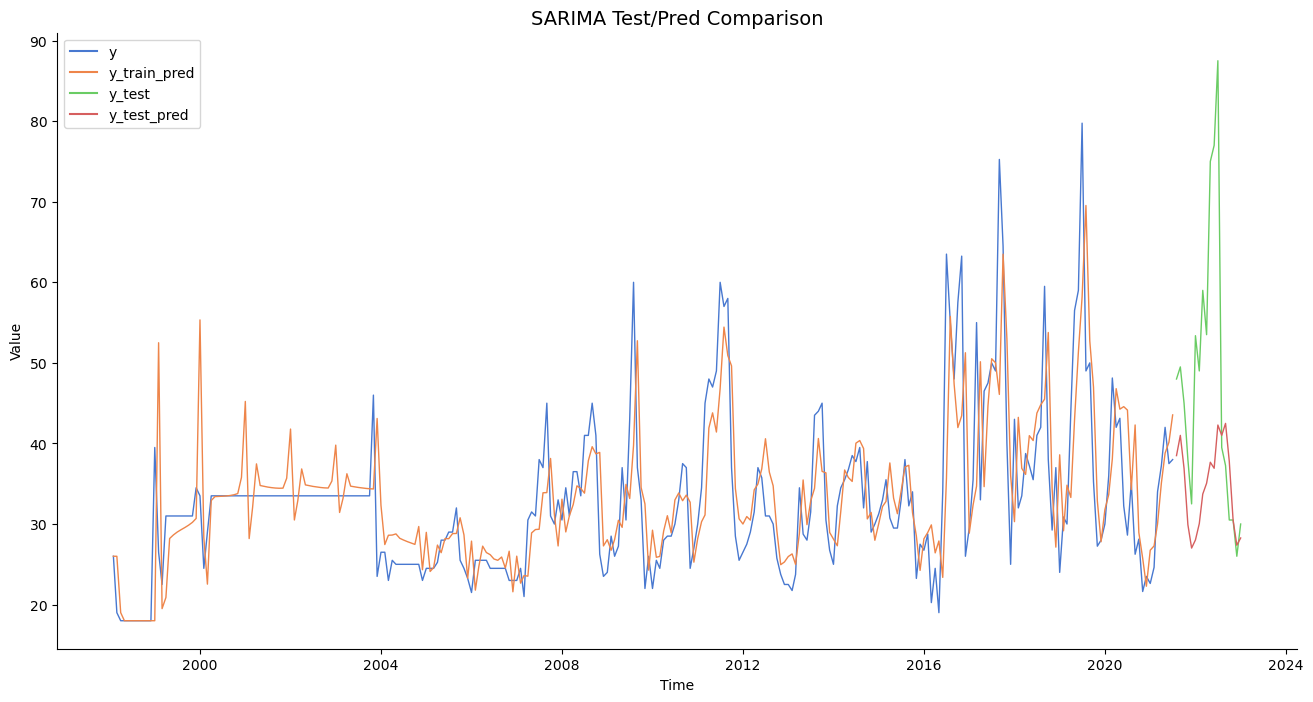

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.title("SARIMA Test/Pred Comparison", fontsize=14)
sns.despine()
sns.lineplot(data=df_union[['y', 'y_train_pred', 'y_test', 'y_test_pred']], linewidth=1.0, dashes=False, palette='muted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()